<a href="https://colab.research.google.com/github/ValentinBarco/UPSO-ML-BD/blob/main/Clasificaci%C3%B3n_Estad%C3%ADstica_Univariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


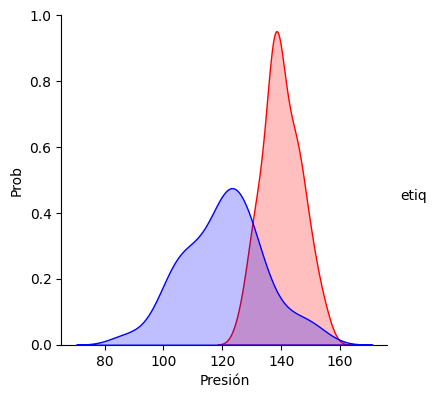

In [2]:

import numpy as np
import pandas as pd

np.random.seed(4)

muestras = 100

media_df1 = 120
desvio_df1 = 14


X1_val = pd.Series(np.random.normal(loc=media_df1, scale=desvio_df1, size=muestras))
X1_etiq = pd.Series(['Sano'] * muestras)
df1 = pd.DataFrame({'val': X1_val, 'etiq': X1_etiq})


media_df2 = 140
desvio_df2 = 7


X2_val = pd.Series(np.random.normal(loc=media_df2, scale=desvio_df2, size=muestras))
X2_etiq = pd.Series(['Enfermo'] * muestras)
df2 = pd.DataFrame({'val': X2_val, 'etiq': X2_etiq})

# Concatenar df1 y df2 para obtener df_res
Dataset = pd.concat([df1, df2], ignore_index=True)


# Crear el pairplot con un tamaño específico
g = sns.pairplot(data=Dataset, hue="etiq", palette={'Sano': 'blue', 'Enfermo': 'red'}, plot_kws={'alpha': 0.7}, height=4)

# Ajustar el número de ticks en el eje x para cada subplot
for ax in g.axes[-1]:
    ax.set_xlabel('Presión')
    ax.set_ylabel('Prob')


plt.show()



In [3]:
Dataset

,val,etiq
0,120.707864,Sano
1,126.999319,Sano
2,106.057275,Sano
3,129.710379,Sano
4,114.143779,Sano
...,...,...
195,140.346336,Enfermo
196,138.170816,Enfermo
197,146.137197,Enfermo
198,136.619849,Enfermo


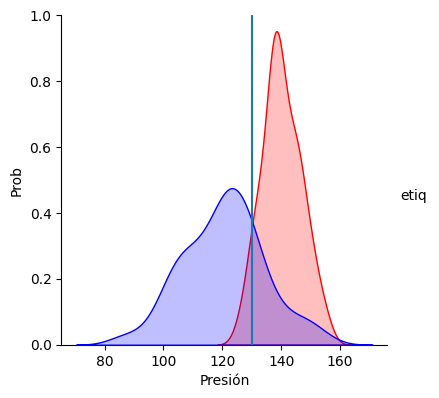

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker



umbral = 130

g = sns.pairplot(data=Dataset, hue="etiq", palette={'Sano': 'blue', 'Enfermo': 'red'}, plot_kws={'alpha': 0.7}, height=4)

for ax in g.axes[-1]:
    ax.set_xlabel('Presión')
    ax.set_ylabel('Prob')

plt.axvline(umbral)

plt.show()



In [5]:
df = Dataset.copy()

df['etiq_binaria'] = df['etiq'].map({'Sano': 0, 'Enfermo': 1})


In [6]:
df

,val,etiq,etiq_binaria
0,120.707864,Sano,0
1,126.999319,Sano,0
2,106.057275,Sano,0
3,129.710379,Sano,0
4,114.143779,Sano,0
...,...,...,...
195,140.346336,Enfermo,1
196,138.170816,Enfermo,1
197,146.137197,Enfermo,1
198,136.619849,Enfermo,1


In [7]:

def predictions(Umbral,df):
  a = pd.Series([0 if x < Umbral else 1 for x in df['val']])
  return a

df["y_pred"] = predictions(umbral, df)

In [8]:
df

,val,etiq,etiq_binaria,y_pred
0,120.707864,Sano,0,0
1,126.999319,Sano,0,0
2,106.057275,Sano,0,0
3,129.710379,Sano,0,0
4,114.143779,Sano,0,0
...,...,...,...,...
195,140.346336,Enfermo,1,1
196,138.170816,Enfermo,1,1
197,146.137197,Enfermo,1,1
198,136.619849,Enfermo,1,1


In [9]:

from sklearn.metrics import confusion_matrix

Vn, Fp, Fn, Vp= confusion_matrix(df.etiq_binaria, df["y_pred"]).ravel()

print("True Negative:\t",Vn, "\nFalse Positive:\t",Fp, "\nFalse Negative:\t",Fn, "\nTrue Positive:\t",Vp)

exactitud= (Vp+Vn)/(Vp+Vn+Fp+Fn)
print("exactitud:\t", exactitud)

precision= Vp/(Vp+Fp)
print("Precision:\t", precision)

sensibilidad = Vp/(Vp+Fn)
print("Sensibilidad:\t\t", sensibilidad)

especificidad = Vn/(Vn+Fp)
print("Especificidad:\t\t",especificidad)

f_mesure= 2*precision*sensibilidad/(precision+sensibilidad)
print("F-Mesure:\t", f_mesure)



True Negative:	 77 
False Positive:	 23 
False Negative:	 6 
True Positive:	 94
exactitud:	 0.855
Precision:	 0.8034188034188035
Sensibilidad:		 0.94
Especificidad:		 0.77
F-Mesure:	 0.8663594470046083


In [10]:

df["pred_0"] = predictions(umbral+5,df)
df["pred_1"] = predictions(umbral+1,df)
df["pred_2"] = predictions(umbral-1,df)
df["pred_3"] = predictions(umbral-6,df)

In [11]:
df

,val,etiq,etiq_binaria,y_pred,pred_0,pred_1,pred_2,pred_3
0,120.707864,Sano,0,0,0,0,0,0
1,126.999319,Sano,0,0,0,0,0,1
2,106.057275,Sano,0,0,0,0,0,0
3,129.710379,Sano,0,0,0,0,1,1
4,114.143779,Sano,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
195,140.346336,Enfermo,1,1,1,1,1,1
196,138.170816,Enfermo,1,1,1,1,1,1
197,146.137197,Enfermo,1,1,1,1,1,1
198,136.619849,Enfermo,1,1,1,1,1,1


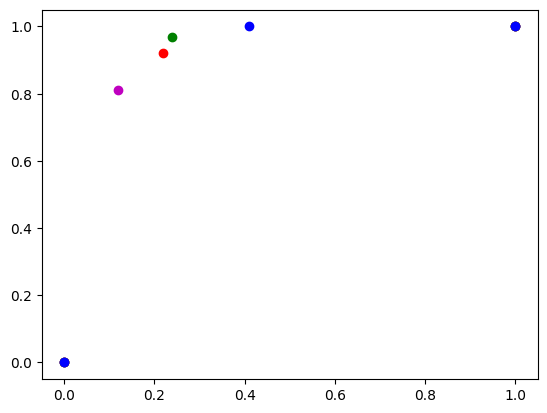

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
predictions_0 =  df['pred_0'].values
predictions_1 =  df['pred_1'].values
predictions_2 =  df['pred_2'].values
predictions_3 =  df['pred_3'].values


fpr0, tpr0, thresholds0 = roc_curve(df.etiq_binaria, predictions_0)
fpr1, tpr1, thresholds1 = roc_curve(df.etiq_binaria, predictions_1)
fpr2, tpr2, thresholds2 = roc_curve(df.etiq_binaria, predictions_2)
fpr3, tpr3, thresholds3 = roc_curve(df.etiq_binaria, predictions_3)

plt.plot(fpr0, tpr0, "mo", fpr1, tpr1, "ro", fpr2, tpr2, "go", fpr3, tpr3, "bo")
plt.show()

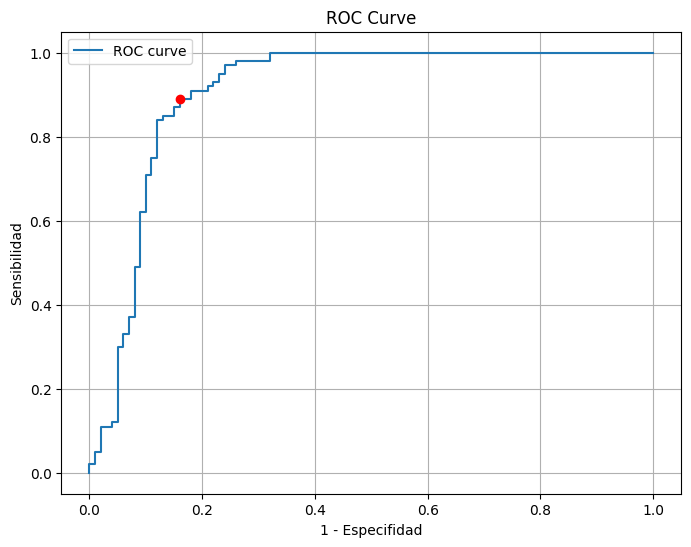

In [13]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np

df_ord= df.sort_values("val", ignore_index=True)

# Obtenemos las etiquetas verdaderas y las puntuaciones de predicción
y_true = df_ord['etiq_binaria']
scores = df_ord['val']


fpr, tpr, thresholds = roc_curve(y_true, scores)


plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, label='ROC curve')

plt.xlabel('1 - Especifidad')
plt.ylabel('Sensibilidad')
plt.title('ROC Curve')
plt.grid(True)
plt.legend()

# PUNTO OPTIMO
optimal_idx = np.argmin(np.sqrt((1-tpr)**2 + fpr**2))
optimal_fpr = fpr[optimal_idx]
optimal_tpr = tpr[optimal_idx]

# Marcar el punto óptimo en rojo
plt.plot(optimal_fpr, optimal_tpr, 'ro', label='Punto óptimo')  # Cambiado 'go' a 'ro'


plt.show()



In [14]:
umbral_optimo = thresholds[optimal_idx]
umbral_optimo

131.82196802530316

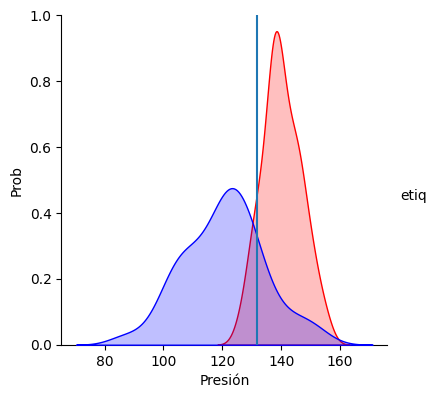

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


# Crear el pairplot con un tamaño específico
g = sns.pairplot(data=Dataset , hue="etiq", palette={"Sano": 'blue', 'Enfermo': 'red'}, plot_kws={'alpha': 0.7}, height=4)

for ax in g.axes[-1]:
    ax.set_xlabel('Presión')
    ax.set_ylabel('Prob')

plt.axvline(umbral_optimo)
# Mostrar la gráfica
plt.show()

